In [79]:
import fitz
import pymupdf
import spacy
import textacy
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
from textacy import text_stats
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textacy import preprocessing

In [45]:
import re

In [64]:
#!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/b9/74/6a15f68f59bc90032bfcf62eca796a5675be95e1aaf84f7861e1bfcfa8e5/wordcloud-1.9.4-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for pillow from https://files.pythonhosted.org/packages/08/5c/2104299949b9d504baf3f4d35f73dbd14ef31bbd1ddc2c1b66a5b7dfda44/pillow-11.1.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/9f/6e/264673e64001b99d747aff5a288eca82826c024437a3694e19aed1decf46/matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/a1/35/c2de8823211d07e8a79ab018ef03960716c5dff6f4d5bff5af87fd682992/contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de51


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#pip install textacy

In [4]:
# load
nlp = spacy.load("en_core_web_sm")


In [5]:
# !pip install spacy

In [6]:
# apparently this has to be loaded to allow for textprocessing
#!python -m spacy download en_core_web_sm

In [7]:
pdf = 'sample.pdf'

In [ ]:
# return text without punctuation, stopwords and spaces in str form
def normalize(text):
    normalized_text = []
    for token in text:
        if not token.is_stop and not token.is_punct and not token.is_space:
            normalized_text.append(token.lemma_.lower())
            normalized_text = ' '.join(normalized_text)

            return normalized_text

In [ ]:
# set up pipeline to preprocess text
 preproc = preprocessing.make_pipeline(
    preprocessing.remove.brackets,
    preprocessing.normlize.hyphenated_words,
    preprocessing.normalize.unicode,
    preprocessing.remove.punctuation,
    preprocessing.replace.urls(repl=" "),
    preprocessing.normalize.whitespace,
    preprocessing.remove.punctuation(),
)

In [72]:
# open document, extract text into variable, clean /n
with pymupdf.open(pdf) as doc:  # open document
    # get all pages into string
    text = " ".join([page.get_text() for page in doc])
    text = text.replace('\n', ' ')
    text = text.replace('et al', ' ')
    # get Document Metadata
    page_count = doc.page_count
    metadata = doc.metadata


    # cleaning references, by removing everything after last occurence of split words
    split_words = ["References", "Appendix", "Appendices", "Footnotes", "Glossary"]

    for word in split_words:
        if word in text:
            text_list = text.split(word)[:-1]
            # test_split = text.split(word)[-1]
            text = " ".join(text_list)

"""""
    re_split = text.split(split)
    text_wo_ref = re_split[:-1]
"""""


'""\n    re_split = text.split(split)\n    text_wo_ref = re_split[:-1]\n'

In [73]:
print(text.count("et al"))

0


In [ ]:
print(test_split)

In [ ]:
print(page_count, metadata)

In [33]:
pdf_author = metadata["author"]
pdf_title = metadata["title"]
pdf_keywords = metadata["keywords"]

print(pdf_author, pdf_title, pdf_keywords)

Martin Fleischmann, Ombretta Romice, and Sergio Porta Measuring urban form: Overcoming terminological inconsistencies for a quantitative and comprehensive morphologic analysis of cities Terminology,classification,urban morphometrics,urban morphology


In [74]:
# use spacys natural languague processing to analyze parsed text, get text into doc format for further processing
text_nlp = nlp(text)

In [11]:
# get statistics on raw text via textacy
word_count = text_stats.basics.n_words(text_nlp)
sentence_count = text_stats.basics.n_sents(text_nlp)
unique_count = text_stats.basics.n_unique_words(text_nlp)

# prozentualen anteil der unique words
unique_per = round((unique_count / word_count) *100, 2)

In [12]:
print(word_count, sentence_count, unique_count)

8488 458 2025


In [13]:
# PDF text to words, remove stopwords
text_word = [token.text for token in text_nlp if not token.is_stop]

In [14]:
text_wo_stop = len(text_word)
print(text_wo_stop)

7600


In [75]:


text_lemma = [token.lemma_ for token in text_nlp if not token.is_stop]

In [84]:
for entity in text_nlp.ents:
    print(entity.text, entity.lemma_,  entity.label_)

Article Urban Analytics article Urban Analytics ORG
Martin Fleischmann Martin Fleischmann PERSON
Ombretta Romice Ombretta Romice ORG
Sergio Porta University Sergio Porta University ORG
UK Abstract UK Abstract ORG
the Great Acceleration the Great Acceleration EVENT
the late 1950s the late 1950 DATE
one one CARDINAL
six six CARDINAL
three three CARDINAL
two two CARDINAL
Corresponding Corresponding ORG
Martin Fleischmann Martin Fleischmann PERSON
University of Strathclyde University of Strathclyde ORG
James Weir Building James Weir Building PERSON
75 75 CARDINAL
Montrose Street Montrose Street FAC
Glasgow G1 1XJ Glasgow G1 1XJ PERSON
UK UK GPE
2020 2020 DATE
10.1177/2399808320910444 journals.sagepub.com/home/epb 2021 10.1177/2399808320910444 journals.sagepub.com/home/epb 2021 CARDINAL
Vol Vol PERSON
48(8 48(8 CARDINAL
﻿2133­–2150 ﻿2133­–2150 ORG
Keywords Terminology Keywords Terminology PERSON
the 21st century the 21st century DATE
Cuthbert Cuthbert PERSON
2007 2007 DATE
Romice Romice GPE

In [16]:
# get readability score, 0 difficult, 100 difficult

read_dif = text_stats.readability.flesch_reading_ease(text_nlp)
print(read_dif)

50.47948855615326


In [76]:
wordcloud = WordCloud().generate(" ".join(text_lemma))

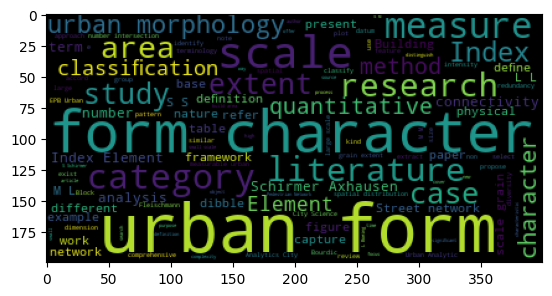

In [77]:
plt.imshow(wordcloud)
plt.show()

In [17]:

doc_try = nlp("Apple is looking at buying U.K. startup for $1 billion")

for token in doc_try:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

Apple Apple PROPN NNP nsubj Xxxxx True False
is be AUX VBZ aux xx True True
looking look VERB VBG ROOT xxxx True False
at at ADP IN prep xx True True
buying buy VERB VBG pcomp xxxx True False
U.K. U.K. PROPN NNP nsubj X.X. False False
startup startup VERB VBD ccomp xxxx True False
for for ADP IN prep xxx True True
$ $ SYM $ quantmod $ False False
1 1 NUM CD compound d False False
billion billion NUM CD pobj xxxx True False
